# <font color=green>热图（Heatmap）和 聚类（Clustering）分析

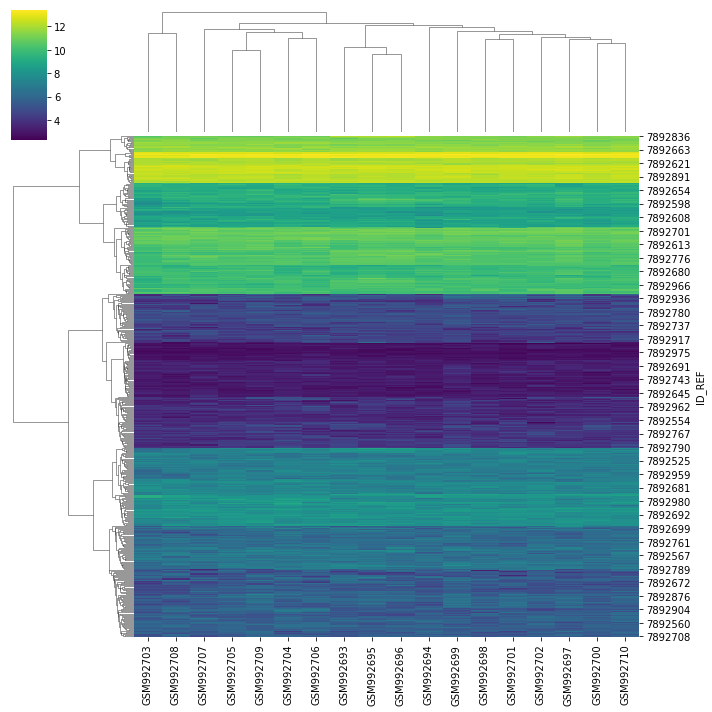

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset as a pandas dataframe
df = pd.read_csv('GSE40392_series_matrix.csv')

# Set gene names as index
df = df.set_index(df.columns[0])

# Perform hierarchical clustering on the rows (genes)
row_cluster = sns.clustermap(df, cmap='viridis', method='average', metric='euclidean')

# Access the reordered dataframe based on clustering
df_clustered = df.iloc[row_cluster.dendrogram_row.reordered_ind]

# Show the plot
plt.show()

# <font color=green>核酸序列检索

## <font color=Chocolate>保存为 fasta 格式

In [1]:
from Bio import Entrez

Entrez.email = "bioinfor_cnu@163.com"
handle = Entrez.efetch(db="nucleotide", id="NC_045512", rettype="fasta", retmode="text")

f = open("NC_045512.fasta", 'w')
f.write(handle.read())
f.close()

## <font color=Chocolate>保存为 GenBank 格式

In [2]:
from Bio import Entrez

Entrez.email = "bioinfor_cnu@163.com"
handle = Entrez.efetch(db="nucleotide", id="NC_045512", rettype="gb", retmode="text")

f = open("NC_045512.gb", 'w')
f.write(handle.read())
f.close()

# <font color=green>蛋白序列检索

## <font color=Chocolate>保存为 fasta 格式

In [3]:
from Bio import Entrez

Entrez.email = "bioinfor_cnu@163.com"
handle = Entrez.efetch(db="protein", id="YP_009724390", rettype="fasta", retmode="text")

f = open("spike_protein.fasta", 'w')
f.write(handle.read())
f.close()

## <font color=Chocolate>保存为 GenBank 格式

In [3]:
from Bio import Entrez

Entrez.email = "bioinfor_cnu@163.com"
handle = Entrez.efetch(db="protein", id="YP_009724390", rettype="gp", retmode="text")

f = open("spike_protein.gp", 'w')
f.write(handle.read())
f.close()

# <font color=green>批量检索

In [4]:
from Bio import Entrez

Entrez.email = "bioinfor_cnu@163.com"

# List of GIs
gi_list = ['123456789', '987654321', '987654322', '987654323']

# Convert the list to a comma-separated string
gi_string = ','.join(gi_list)

# Fetch the records
handle = Entrez.efetch(db="protein", id=gi_string, rettype="fasta", retmode="text")

f = open("batch_entrez.fasta", 'w')
f.write(handle.read())
f.close()

In [2]:
from Bio import Entrez

Entrez.email = "bioinfor_cnu@163.com"

# List of GIs
gi_list = ['Q53HC9', 'Q5TCS8']

# Convert the list to a comma-separated string
gi_string = ','.join(gi_list)

# Fetch the records
handle = Entrez.efetch(db="protein", id=gi_string, rettype="fasta", retmode="text")

f = open("Q53HC9_Q5TCS8.fasta", 'w')
f.write(handle.read())
f.close()

# <font color=green>解析 Fasta 文件

In [5]:
import csv
from Bio import SeqIO
from Bio.SeqUtils.ProtParam import ProteinAnalysis

# Create a list to store the amino acid compositions
aa_compositions = []

# Get the unique set of amino acids across all sequences
all_aa = set()

for seq_record in SeqIO.parse("batch_entrez.fasta", "fasta"):
    # sequence id
    seq_id = seq_record.id

    # sequence length
    seq_length = len(seq_record)

    # sequence
    sequence = seq_record.seq

    # Calculate amino acid composition
    protein_analysis = ProteinAnalysis(str(sequence))
    aa_composition = protein_analysis.get_amino_acids_percent()

    # Store the amino acid composition along with sequence ID and length
    aa_compositions.append({"Sequence ID": seq_id, "Sequence Length": seq_length, **aa_composition})

    # Update the set of unique amino acids
    all_aa.update(aa_composition.keys())

# Define the output file name
output_file = "amino_acid_compositions.csv"

# Define the field names for the CSV file
field_names = ["Sequence ID", "Sequence Length"] + sorted(all_aa)

# Write the amino acid compositions to the CSV file
with open(output_file, mode='w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=field_names)
    writer.writeheader()
    writer.writerows(aa_compositions)

print("Amino acid compositions saved to", output_file)


Amino acid compositions saved to amino_acid_compositions.csv


# <font color=green>解析 GenBank/GenPept 文件

## <font color=Chocolate>读取 GenBank 文件

In [6]:
from Bio import SeqIO

record = SeqIO.read("NC_045512.gb","genbank") # SARS-CoV-2 基因组

## <font color=Chocolate>输出基因组长度

In [7]:
print(len(record.seq))

29903


## <font color=Chocolate>输出基因组长度

In [8]:
feat_genes = []

for i in range( len(record.features)):
    if record.features[i]. type == "gene": 
        feat_genes.append(record.features[i])

print(len(feat_genes))

11


## <font color=Chocolate>输出每个基因的名称、在基因组中的位置、所在链和读码框

In [9]:
for f in feat_genes: 
    print (f.qualifiers['gene'], f.location,f.strand)

['ORF1ab'] [265:21555](+) 1
['S'] [21562:25384](+) 1
['ORF3a'] [25392:26220](+) 1
['E'] [26244:26472](+) 1
['M'] [26522:27191](+) 1
['ORF6'] [27201:27387](+) 1
['ORF7a'] [27393:27759](+) 1
['ORF7b'] [27755:27887](+) 1
['ORF8'] [27893:28259](+) 1
['N'] [28273:29533](+) 1
['ORF10'] [29557:29674](+) 1


## <font color=Chocolate>提取 spike 基因序列

In [10]:
for f in feat_genes:
    if f.qualifiers['gene'][0]=='S':
        spike_gene = f.extract(record.seq)
        print(spike_gene)
        print(len(spike_gene))

ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAATCTTACAACCAGAACTCAATTACCCCCTGCATACACTAATTCTTTCACACGTGGTGTTTATTACCCTGACAAAGTTTTCAGATCCTCAGTTTTACATTCAACTCAGGACTTGTTCTTACCTTTCTTTTCCAATGTTACTTGGTTCCATGCTATACATGTCTCTGGGACCAATGGTACTAAGAGGTTTGATAACCCTGTCCTACCATTTAATGATGGTGTTTATTTTGCTTCCACTGAGAAGTCTAACATAATAAGAGGCTGGATTTTTGGTACTACTTTAGATTCGAAGACCCAGTCCCTACTTATTGTTAATAACGCTACTAATGTTGTTATTAAAGTCTGTGAATTTCAATTTTGTAATGATCCATTTTTGGGTGTTTATTACCACAAAAACAACAAAAGTTGGATGGAAAGTGAGTTCAGAGTTTATTCTAGTGCGAATAATTGCACTTTTGAATATGTCTCTCAGCCTTTTCTTATGGACCTTGAAGGAAAACAGGGTAATTTCAAAAATCTTAGGGAATTTGTGTTTAAGAATATTGATGGTTATTTTAAAATATATTCTAAGCACACGCCTATTAATTTAGTGCGTGATCTCCCTCAGGGTTTTTCGGCTTTAGAACCATTGGTAGATTTGCCAATAGGTATTAACATCACTAGGTTTCAAACTTTACTTGCTTTACATAGAAGTTATTTGACTCCTGGTGATTCTTCTTCAGGTTGGACAGCTGGTGCTGCAGCTTATTATGTGGGTTATCTTCAACCTAGGACTTTTCTATTAAAATATAATGAAAATGGAACCATTACAGATGCTGTAGACTGTGCACTTGACCCTCTCTCAGAAACAAAGTGTACGTTGAAATCCTTCACTGTAGAAAAAGGAATCTATCAAACTTCTAACTTTAGAGTCCAACCAACAGAATCTATTGTTAGATTTCCTAATATTACAA

## <font color=Chocolate>将 spike 基因序列翻译成氨基酸序列

In [14]:
spike_protein = spike_gene.translate(table = 1, cds = True)

print(spike_protein)
print(len(spike_protein))

MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLITGR

## <font color=Chocolate>计算 spike 蛋白的分子量

In [15]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

ProteinAnalysis(spike_protein).molecular_weight()

141176.8160000004

## <font color=Chocolate>计算 spike 蛋白的等电点

In [16]:
ProteinAnalysis(spike_protein).isoelectric_point()

6.236453819274902

## <font color=Chocolate>计算 spike 蛋白的疏水性

In [17]:
ProteinAnalysis(spike_protein).gravy()

-0.07918303220738451

## <font color=Chocolate>计算基因组的 GC 含量

In [21]:
from Bio.Seq import Seq
from Bio.SeqUtils import GC

genome_sequence = record.seq

GC_content = GC(genome_sequence)
print("GC content:",GC_content,"%")

GC content: 37.97277865097148 %


## <font color=Chocolate>统计基因组中的碱基数目

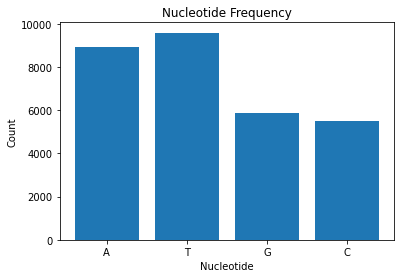

In [22]:
import matplotlib.pyplot as plt

nucleotide_counts = genome_sequence.count('A'), genome_sequence.count('T'), genome_sequence.count('G'), genome_sequence.count('C')
nucleotides = ['A', 'T', 'G', 'C']

plt.bar(nucleotides, nucleotide_counts)
plt.xlabel('Nucleotide')
plt.ylabel('Count')
plt.title('Nucleotide Frequency')
plt.show()

## <font color=Chocolate>GenBank 文件的可视化

Text(0, 0.5, 'GC(%)')

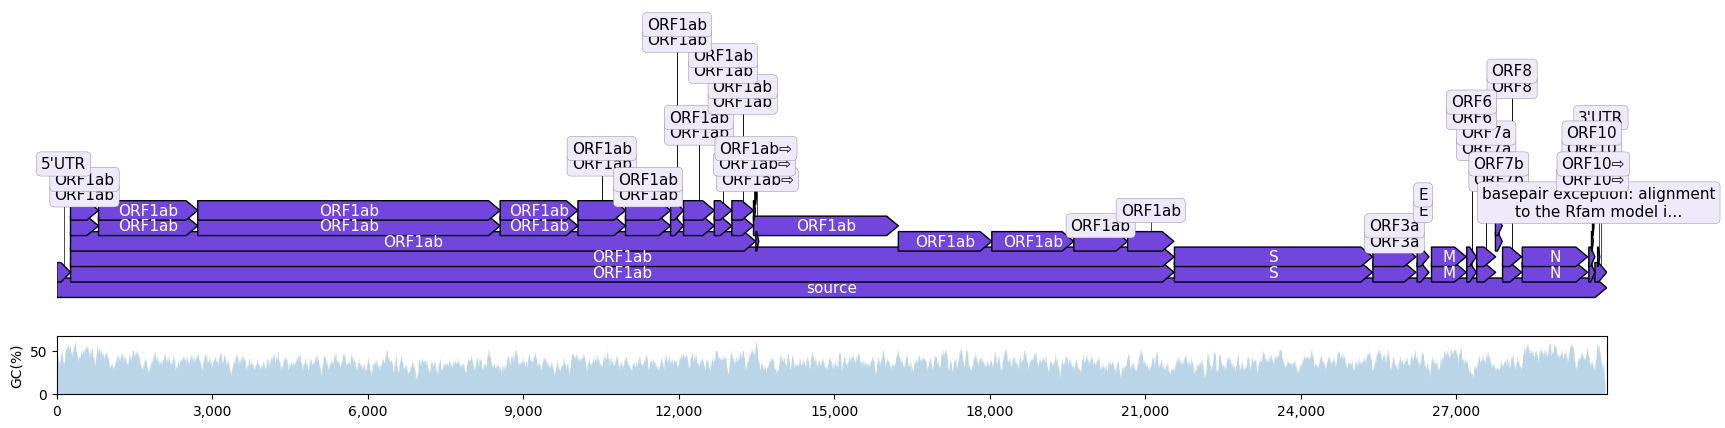

In [11]:
import matplotlib.pyplot as plt
from dna_features_viewer import BiopythonTranslator
from Bio import SeqIO
import numpy as np

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 5), sharex=True, gridspec_kw={"height_ratios": [5, 1]})

# PLOT THE RECORD MAP
record = SeqIO.read("NC_045512.gb", "genbank")
graphic_record = BiopythonTranslator().translate_record(record)
graphic_record.plot(ax=ax1, with_ruler=False, strand_in_label_threshold=4)

# PLOT THE LOCAL GC CONTENT (use 50bp windows)
gc = lambda s: 100.0 * len([c for c in s if c in "GC"]) / 50
xx = np.arange(len(record.seq) - 50)
yy = [gc(record.seq[x : x + 50]) for x in xx]
ax2.fill_between(xx + 25, yy, alpha=0.3)
ax2.set_ylim(bottom=0)
ax2.set_ylabel("GC(%)")

## <font color=green>DNA 序列的马尔可夫链（Markov Chain, MC）模型

## <font color=Chocolate>DNA 序列的马尔可夫链模型

In [13]:
import mchmm as mc
import pandas as pd

# DNA 序列
dna_sequence = mc.MarkovChain().from_data('AGTCGTGGCTCCACTAAGACTTACTGCGGATAGGTATAA')

# Convert the frequency matrix to a pandas DataFrame
frequency_matrix = pd.DataFrame(
    data=dna_sequence.observed_matrix,
    index=dna_sequence.states,
    columns=dna_sequence.states
)

print("\n频数矩阵：")
print(frequency_matrix)

# Convert the probability matrix to a pandas DataFrame
probability_matrix = pd.DataFrame(
    data=dna_sequence.observed_p_matrix,
    index=dna_sequence.states,
    columns=dna_sequence.states
)
print("\n状态转移概率矩阵：")
print(probability_matrix)


频数矩阵：
     A    C    G    T
A  2.0  3.0  3.0  2.0
C  1.0  1.0  2.0  4.0
G  2.0  2.0  3.0  3.0
T  5.0  2.0  2.0  1.0

状态转移概率矩阵：
       A      C     G    T
A  0.200  0.300  0.30  0.2
C  0.125  0.125  0.25  0.5
G  0.200  0.200  0.30  0.3
T  0.500  0.200  0.20  0.1


## <font color=Chocolate>马尔可夫链的平稳分布

### <font color=RoyalBlue>当初始状态分布向量为 [0.25, 0.25, 0.25, 0.25] 时

[0.21584249 0.22554945 0.28058608 0.27802198]
[0.23138738 0.23876685 0.26125823 0.26858753]
[0.22624634 0.2299045  0.2701287  0.27372045]
[0.22906026 0.23412077 0.26712208 0.26969688]
[0.22681402 0.23278664 0.26874316 0.27165617]
[0.22790622 0.23345103 0.26747886 0.27116387]
[0.22764058 0.23287643 0.26809831 0.27138466]
[0.22775918 0.2331788  0.26794014 0.27112186]
[0.22761207 0.23310664 0.26801013 0.27127114]
[0.22769583 0.23313111 0.26792785 0.27124518]
[0.22768199 0.23309465 0.26797492 0.27124841]
[0.22768333 0.2331182  0.26796647 0.27123198]
[0.22767412 0.23311397 0.26796754 0.27124434]
[0.2276811  0.23311375 0.26796242 0.27124268]
[0.22768022 0.23311162 0.26796631 0.27124181]
[0.22767969 0.23311359 0.26796576 0.27124092]
[0.22767919 0.23311327 0.26796549 0.27124201]
[0.2276798  0.23311308 0.26796522 0.27124185]
[0.22767971 0.23311299 0.26796556 0.27124169]
[0.22767962 0.23311316 0.26796551 0.27124166]


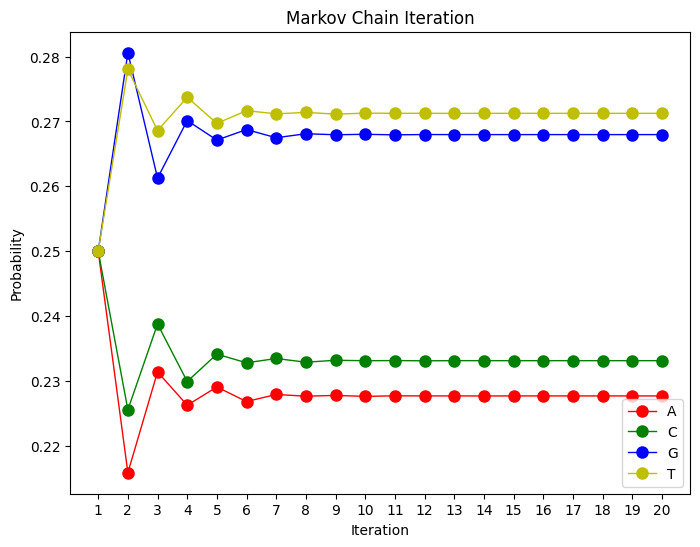

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 定义状态转移矩阵
P = np.array([[0.07692308,0.15384615,0.69230769,0.07692308],
              [0.07692308,0.07692308,0.15384615,0.69230769],
              [0.06666667,0.6,       0.13333333,0.2       ],
              [0.64285714,0.07142857,0.14285714,0.14285714]])

# 定义初始状态分布向量
x = np.array([0.25, 0.25, 0.25, 0.25])

# 存储每一步迭代后的状态分布向量
xs = [x]

# 迭代10次，计算每次迭代后的状态分布向量
for i in range(20):
    x = np.dot(x, P)
    xs.append(x)
    print(x)

# 将状态分布向量的每个分量取出，画出每一步迭代后四种基碱的出现概率
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 21), [x[0] for x in xs[:-1]], 'ro-', linewidth=1, markersize=8, label='A')
plt.plot(np.arange(1, 21), [x[1] for x in xs[:-1]], 'go-', linewidth=1, markersize=8, label='C')
plt.plot(np.arange(1, 21), [x[2] for x in xs[:-1]], 'bo-', linewidth=1, markersize=8, label='G')
plt.plot(np.arange(1, 21), [x[3] for x in xs[:-1]], 'yo-', linewidth=1, markersize=8, label='T')
plt.xticks(np.arange(1, 21))
plt.xlabel('Iteration')
plt.ylabel('Probability')
plt.title('Markov Chain Iteration')
plt.legend()
plt.show()

### <font color=RoyalBlue>当初始状态分布向量为 [0.2, 0.3, 0.2, 0.3] 时：

[0.24465202 0.19527473 0.25413919 0.30593406]
[0.24745503 0.22699585 0.27700683 0.24854228]
[0.21474053 0.23948834 0.27867774 0.26709338]
[0.22522209 0.23774393 0.26082411 0.27620987]
[0.23056453 0.22916129 0.26673407 0.2735401 ]
[0.228993   0.23267828 0.26951888 0.26880982]
[0.22628742 0.23404005 0.26866753 0.27100499]
[0.22753847 0.23337454 0.26720401 0.27188295]
[0.22805035 0.23270042 0.26789803 0.27135118]
[0.22774228 0.23310574 0.26816526 0.27098669]
[0.22753326 0.23322383 0.2679979  0.27124497]
[0.22768115 0.23311879 0.26788595 0.27131407]
[0.22772141 0.23307123 0.26796712 0.27124021]
[0.22767877 0.23311719 0.26798794 0.27121606]
[0.22766489 0.23312493 0.26796482 0.27124531]
[0.22768168 0.23311161 0.2679575  0.27124916]
[0.22768393 0.23310905 0.26796665 0.27124032]
[0.22767883 0.23311406 0.26796777 0.27123928]
[0.22767824 0.23311426 0.26796501 0.27124244]
[0.22768005 0.23311275 0.26796471 0.27124243]


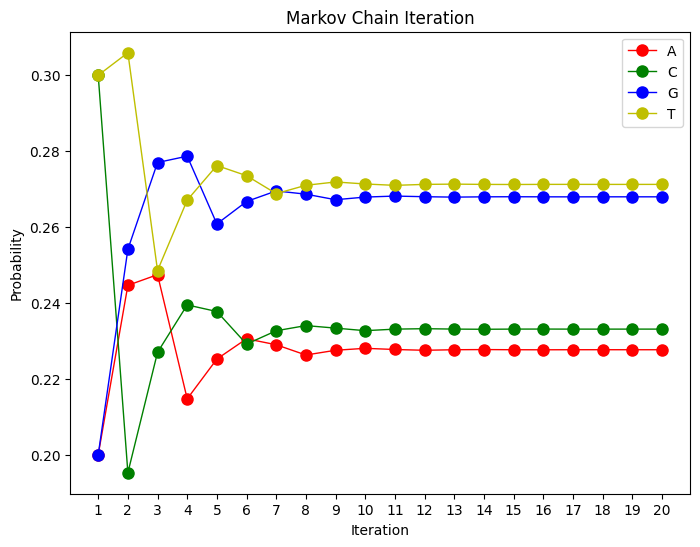

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# 定义状态转移矩阵
P = np.array([[0.07692308,0.15384615,0.69230769,0.07692308],
              [0.07692308,0.07692308,0.15384615,0.69230769],
              [0.06666667,0.6,       0.13333333,0.2       ],
              [0.64285714,0.07142857,0.14285714,0.14285714]])

# 定义初始状态分布向量
x = np.array([0.2, 0.3, 0.2, 0.3])

# 存储每一步迭代后的状态分布向量
xs = [x]

# 迭代10次，计算每次迭代后的状态分布向量
for i in range(20):
    x = np.dot(x, P)
    xs.append(x)
    print(x)

# 将状态分布向量的每个分量取出，画出每一步迭代后四种基碱的出现概率
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 21), [x[0] for x in xs[:-1]], 'ro-', linewidth=1, markersize=8, label='A')
plt.plot(np.arange(1, 21), [x[1] for x in xs[:-1]], 'go-', linewidth=1, markersize=8, label='C')
plt.plot(np.arange(1, 21), [x[2] for x in xs[:-1]], 'bo-', linewidth=1, markersize=8, label='G')
plt.plot(np.arange(1, 21), [x[3] for x in xs[:-1]], 'yo-', linewidth=1, markersize=8, label='T')
plt.xticks(np.arange(1, 21))
plt.xlabel('Iteration')
plt.ylabel('Probability')
plt.title('Markov Chain Iteration')
plt.legend()
plt.show()